In [1]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Add the project root directory to sys.path
project_root = Path('.').resolve().parent
sys.path.insert(0, str(project_root))


In [3]:
# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12


In [4]:
# Import project modules
from src.data.data_ingestion import DataIngestion
from src.data.data_preprocessing import DataPreprocessing
from src.features.macro_indicators import MacroIndicators
from src.features.sector_indicators import SectorIndicators

##  Data Preparation

In [5]:
data_ingestion = DataIngestion()
processed_dir = data_ingestion.processed_dir

2025-05-04 17:58:47,185 - src.data.data_ingestion - INFO - Data directories initialized: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [6]:
# List of required processed files
required_files = [
    'portfolio_data.csv',
    'price_data.csv',
    'sector_data.csv',
    'macro_data.csv'
]

In [7]:
# Check if all required files exist
files_exist = all([(processed_dir / file).exists() for file in required_files])


In [10]:
if not files_exist:
    print("Running preprocessing pipeline...")
    data_preprocessing = DataPreprocessing(data_ingestion)
    portfolio_df, prices_df, sector_df, macro_df = data_preprocessing.run_preprocessing_pipeline()
    print("Preprocessing complete.")
else:
    print("Processed data files already exist. Loading data...")
    # Load the data directly
    portfolio_df = pd.read_csv(processed_dir / 'portfolio_data.csv')
    prices_df = pd.read_csv(processed_dir / 'price_data.csv')
    prices_df['Date'] = pd.to_datetime(prices_df['Date'])
    sector_df = pd.read_csv(processed_dir / 'sector_data.csv')
    sector_df['Date'] = pd.to_datetime(sector_df['Date'])
    macro_df = pd.read_csv(processed_dir / 'macro_data.csv')
    macro_df['Date'] = pd.to_datetime(macro_df['Date'])
    print("Data loading complete.")

Processed data files already exist. Loading data...
Data loading complete.


##  Exploratory Data Analysis

In [11]:
# Display portfolio summary
print("Portfolio Summary:")
print(f"Number of stocks: {len(portfolio_df)}")
print("Sector distribution:")
sector_counts = portfolio_df.groupby('Sector').size()
print(sector_counts)

Portfolio Summary:
Number of stocks: 27
Sector distribution:
Sector
Agriculture             5
Consumer Goods          1
Engineering             3
Entertainment           1
Finance                 5
Food & Beverages        1
Healthcare              1
IT                      4
Military Engineering    2
Natural Resources       1
Pharmaceuticals         2
Telecommunications      1
dtype: int64


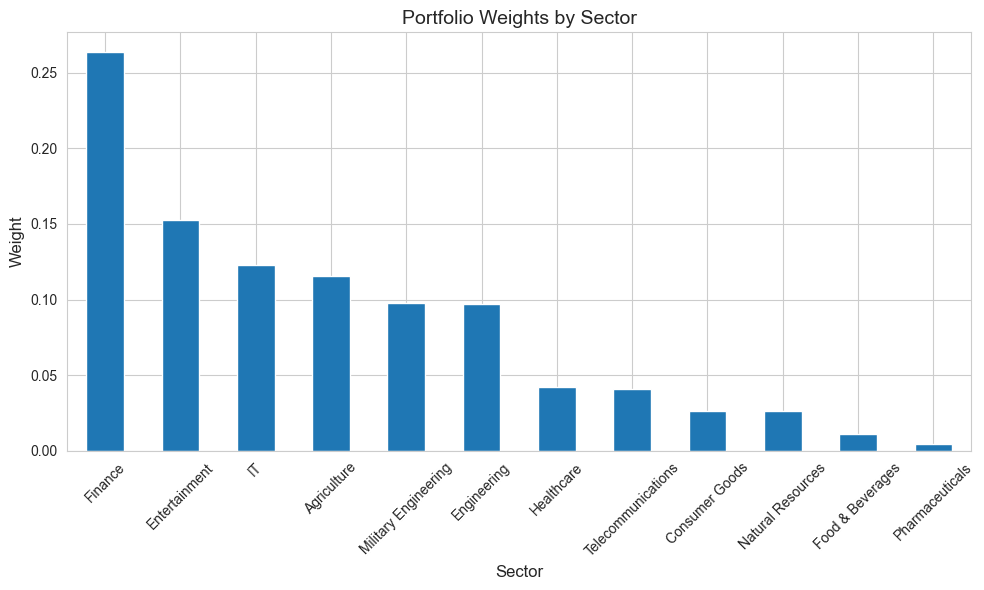

In [12]:
# Visualize sector weights
plt.figure(figsize=(10, 6))
sector_weights = portfolio_df.groupby('Sector')['Weight'].sum().sort_values(ascending=False)
sector_weights.plot(kind='bar')
plt.title('Portfolio Weights by Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Examine price data
print("Price Data Summary:")
print(f"Date range: {prices_df['Date'].min()} to {prices_df['Date'].max()}")
print(f"Number of unique tickers: {prices_df['Ticker'].nunique()}")

Price Data Summary:
Date range: 2020-01-03 00:00:00 to 2025-03-21 00:00:00
Number of unique tickers: 27


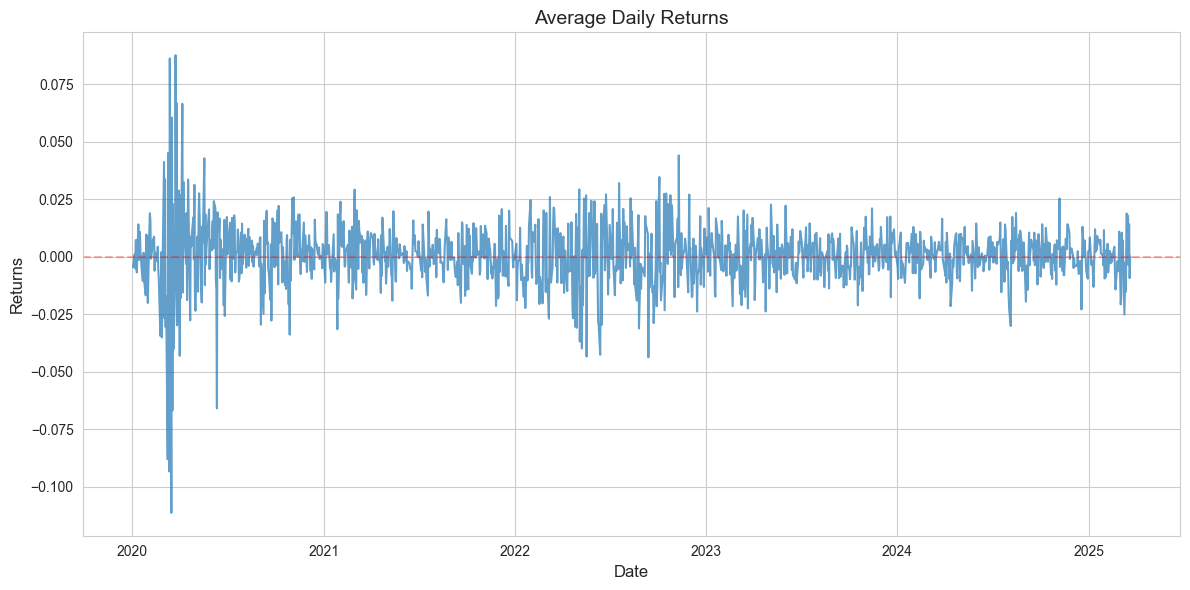

In [14]:
# Plot average daily returns over time
daily_returns = prices_df.groupby('Date')['Returns'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_returns['Date'], daily_returns['Returns'], alpha=0.7)
plt.title('Average Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Examine sector data
print("Sector Data Summary:")
print(f"Number of unique sectors: {sector_df['Sector'].nunique()}")
print("Unique sectors:")
print(sector_df['Sector'].unique())

Sector Data Summary:
Number of unique sectors: 12
Unique sectors:
['Agriculture' 'Consumer Goods' 'Engineering' 'Entertainment' 'Finance'
 'Food & Beverages' 'Healthcare' 'IT' 'Military Engineering'
 'Natural Resources' 'Pharmaceuticals' 'Telecommunications']


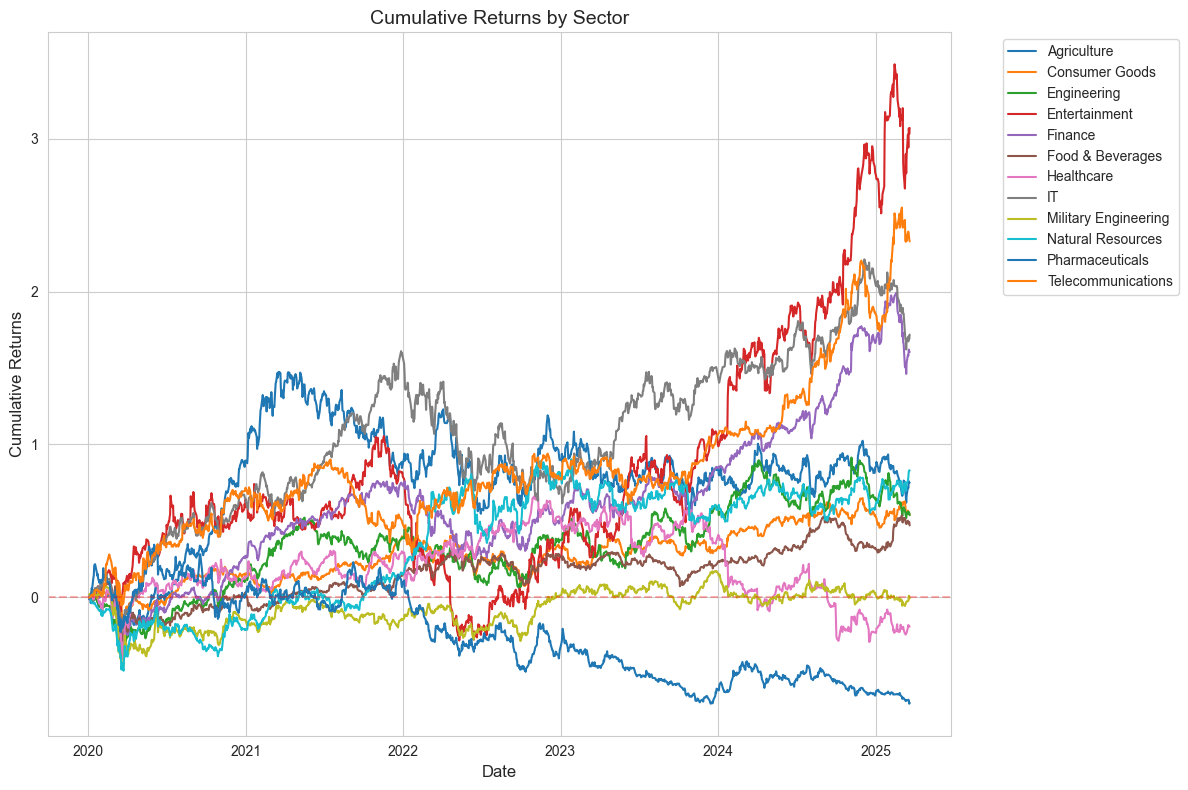

In [16]:
# Plot cumulative returns by sector
plt.figure(figsize=(12, 8))
for sector in sector_df['Sector'].unique():
    sector_data = sector_df[sector_df['Sector'] == sector].sort_values('Date')
    plt.plot(sector_data['Date'], sector_data['Cumulative_Returns'], label=sector)

plt.title('Cumulative Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Generate Macro Indicators

In [17]:
# Initialize the MacroIndicators class
macro_indicators = MacroIndicators()

2025-05-04 18:02:14,601 - src.features.macro_indicators - INFO - MacroIndicators initialized with data directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [18]:
# Generate macro features
macro_features = macro_indicators.generate_macro_features()

2025-05-04 18:02:20,902 - src.features.macro_indicators - INFO - Generating all macro indicators
2025-05-04 18:02:20,902 - src.features.macro_indicators - INFO - loading processed price data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\price_data.csv
2025-05-04 18:02:20,966 - src.features.macro_indicators - INFO - loading processed macro data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\macro_data.csv
2025-05-04 18:02:20,971 - src.features.macro_indicators - INFO - Processed data loaded successfully
2025-05-04 18:02:20,973 - src.features.macro_indicators - INFO - Calculating market indicators
2025-05-04 18:02:20,980 - src.features.macro_indicators - INFO - Market indicators calculated successfully
2025-05-04 18:02:20,981 - src.features.macro_indicators - INFO - calculating trend indicators
2025-05-04 18:02:20,986 - src.features.macro_indicators - INFO - Trend indicators calculated successfully
2025-05-04 18:02:20,987 - src.feature

In [19]:
macro_features.head()

,Date,Returns,Volume,Adjusted,Market_Momentum_20d,Market_Trend_50d,Market_Volatility_20d,Volume_Trend_20d,Market_Return,Risk_Free_Rate,...,VIX_TREND,VIX_Regime,Market_Return_MA_20d,Market_Return_MA_50d,Market_Trend_Regime,Risk_Free_Rate_Trend,Rate_Regime,Market_Return_Momentum,VIX_Momentum,Economic_Cycle
0,2020-01-03,-0.004520,341320348,128.910455,NaN,NaN,NaN,NaN,-0.002342,0.000124,...,NaN,1,NaN,NaN,0,NaN,0,NaN,NaN,1
1,2020-01-06,0.001149,315847951,129.604255,NaN,NaN,NaN,NaN,-0.007476,0.000144,...,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,1
2,2020-01-07,-0.005065,280299907,128.927742,NaN,NaN,NaN,NaN,-0.001014,0.000097,...,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,1
3,2020-01-08,0.007220,341224907,129.773971,NaN,NaN,NaN,NaN,-0.004485,0.000188,...,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,1
4,2020-01-09,0.007258,353479795,130.032851,NaN,NaN,NaN,NaN,-0.001509,0.000087,...,NaN,0,NaN,NaN,0,NaN,0,NaN,NaN,1


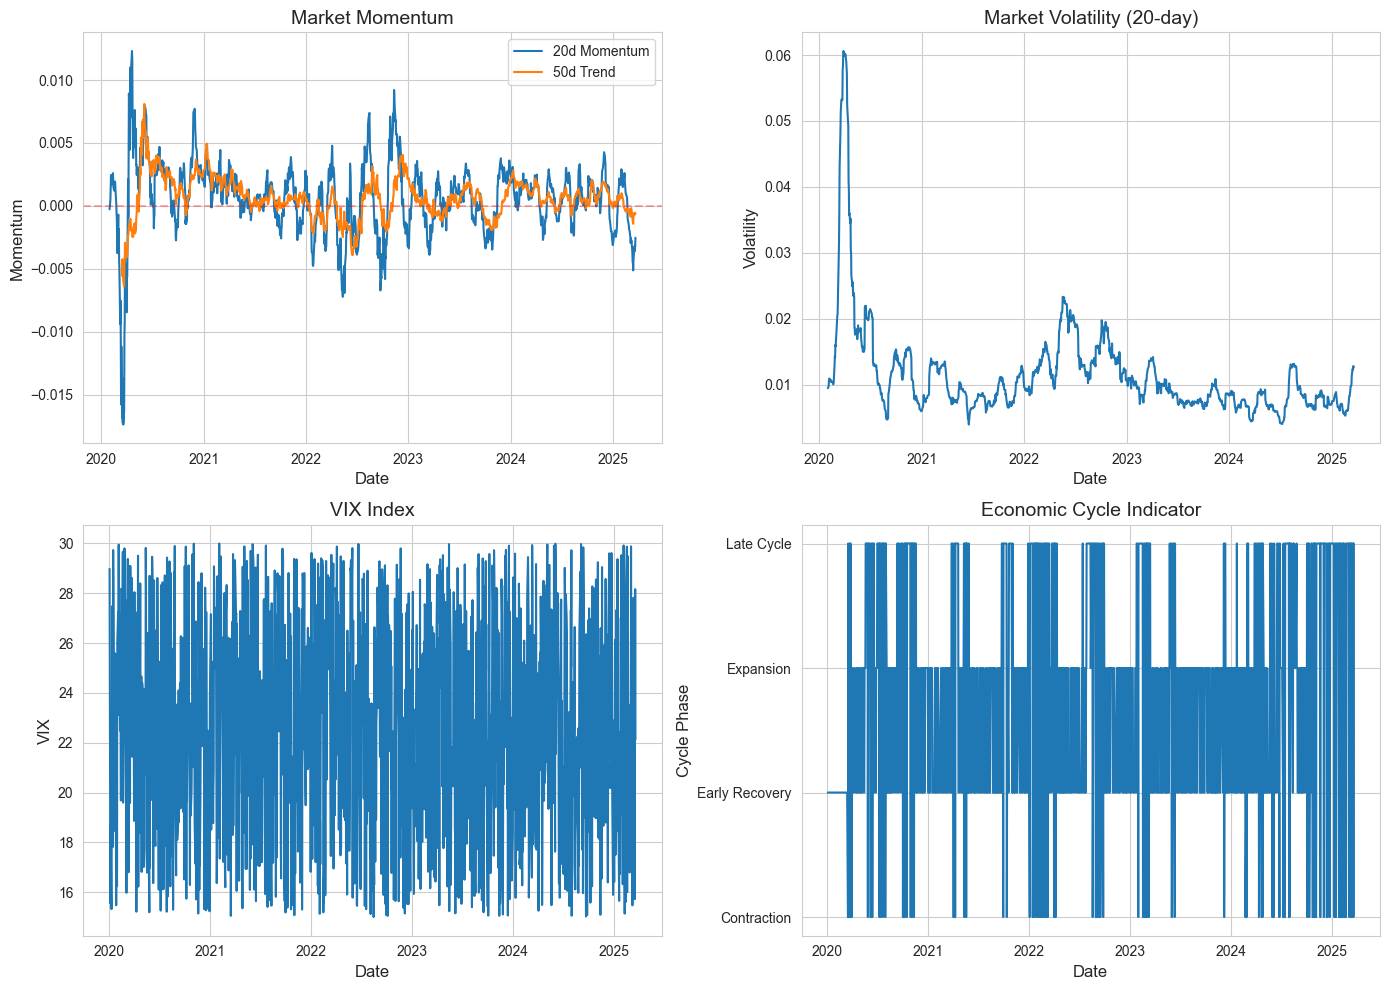

In [20]:
# Plot key macro indicators
plt.figure(figsize=(14, 10))

# Market Momentum
plt.subplot(2, 2, 1)
plt.plot(macro_features['Date'], macro_features['Market_Momentum_20d'], label='20d Momentum')
plt.plot(macro_features['Date'], macro_features['Market_Trend_50d'], label='50d Trend')
plt.title('Market Momentum')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend()
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Market Volatility
plt.subplot(2, 2, 2)
plt.plot(macro_features['Date'], macro_features['Market_Volatility_20d'])
plt.title('Market Volatility (20-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')

# VIX
plt.subplot(2, 2, 3)
plt.plot(macro_features['Date'], macro_features['VIX'])
plt.title('VIX Index')
plt.xlabel('Date')
plt.ylabel('VIX')

# Economic Cycle
plt.subplot(2, 2, 4)
plt.plot(macro_features['Date'], macro_features['Economic_Cycle'])
plt.title('Economic Cycle Indicator')
plt.xlabel('Date')
plt.ylabel('Cycle Phase')
plt.yticks([0, 1, 2, 3], ['Contraction', 'Early Recovery', 'Expansion', 'Late Cycle'])

plt.tight_layout()
plt.show()


## Generate Sector Indicators

In [21]:
# Initialize the SectorIndicators class
sector_indicators = SectorIndicators()

2025-05-04 18:03:24,174 - src.features.sector_indicators - INFO - SectorIndicators initialized with data directory: D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data


In [22]:
# Generate sector features
sector_features = sector_indicators.generate_sector_features()
sector_features.head()

2025-05-04 18:03:38,693 - src.features.sector_indicators - INFO - Generating all sector indicators
2025-05-04 18:03:38,694 - src.features.sector_indicators - INFO - Loading processed sector data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\sector_data.csv
2025-05-04 18:03:38,733 - src.features.sector_indicators - INFO - Loading processed price data from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\price_data.csv
2025-05-04 18:03:38,796 - src.features.sector_indicators - INFO - Loading macro indicators from D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\macro_indicators.csv
2025-05-04 18:03:38,824 - src.features.sector_indicators - INFO - Preprocessed data loaded successfully
2025-05-04 18:03:38,831 - src.features.sector_indicators - INFO - calculating sector relative strength
2025-05-04 18:03:38,860 - src.features.sector_indicators - INFO - Sector relative strength calculated successfully
2025-05-04 18:03:38,861 - 

,Date,Sector,Returns,Volume,Adjusted,Cumulative_Returns,Return_20d,Return_50d,Volatility_20d,Market_Returns,...,Expected_Contraction_Returns,Expected_Early_Recovery_Returns,Expected_Expansion_Returns,Expected_Late_Cycle_Returns,Cycle_Expectation_Score,Relative_Strength_20d_Rank,Momentum_Score_Rank,Volatility_1m_Rank,Composite_Rank,Final_Rank
0,2020-01-03,Agriculture,0.000549,2805900,63.694440,0.000549,NaN,NaN,NaN,-0.00452,...,0.0,0.000461,0.0,0.0,0.000461,NaN,NaN,NaN,NaN,NaN
1311,2020-01-03,Consumer Goods,-0.006726,7970500,107.690681,-0.006726,NaN,NaN,NaN,-0.00452,...,0.0,0.000228,0.0,0.0,0.000228,NaN,NaN,NaN,NaN,NaN
2622,2020-01-03,Engineering,-0.007040,3879700,127.200534,-0.007040,NaN,NaN,NaN,-0.00452,...,0.0,0.000581,0.0,0.0,0.000581,NaN,NaN,NaN,NaN,NaN
3933,2020-01-03,Entertainment,-0.011855,3806900,325.899994,-0.011855,NaN,NaN,NaN,-0.00452,...,0.0,0.002794,0.0,0.0,0.002794,NaN,NaN,NaN,NaN,NaN
5244,2020-01-03,Finance,-0.013793,95809400,150.984651,-0.013793,NaN,NaN,NaN,-0.00452,...,0.0,0.000907,0.0,0.0,0.000907,NaN,NaN,NaN,NaN,NaN


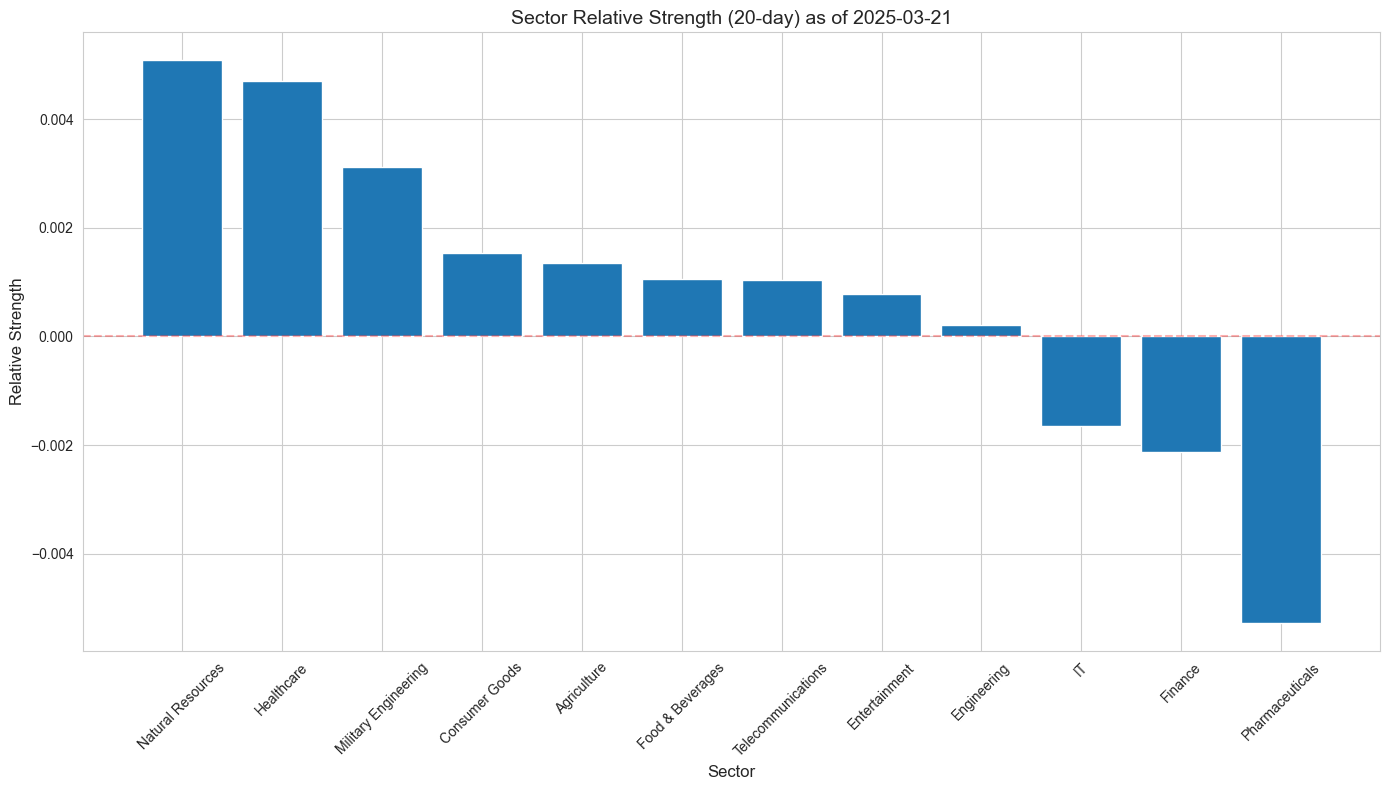

In [23]:
# Plot relative strength by sector
plt.figure(figsize=(14, 8))
# Get the most recent date
latest_date = sector_features['Date'].max()
latest_data = sector_features[sector_features['Date'] == latest_date]

# Sort by relative strength
sorted_data = latest_data.sort_values('Relative_Strength_20d', ascending=False)

# Plot
plt.bar(sorted_data['Sector'], sorted_data['Relative_Strength_20d'])
plt.title(f'Sector Relative Strength (20-day) as of {latest_date.date()}')
plt.xlabel('Sector')
plt.ylabel('Relative Strength')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

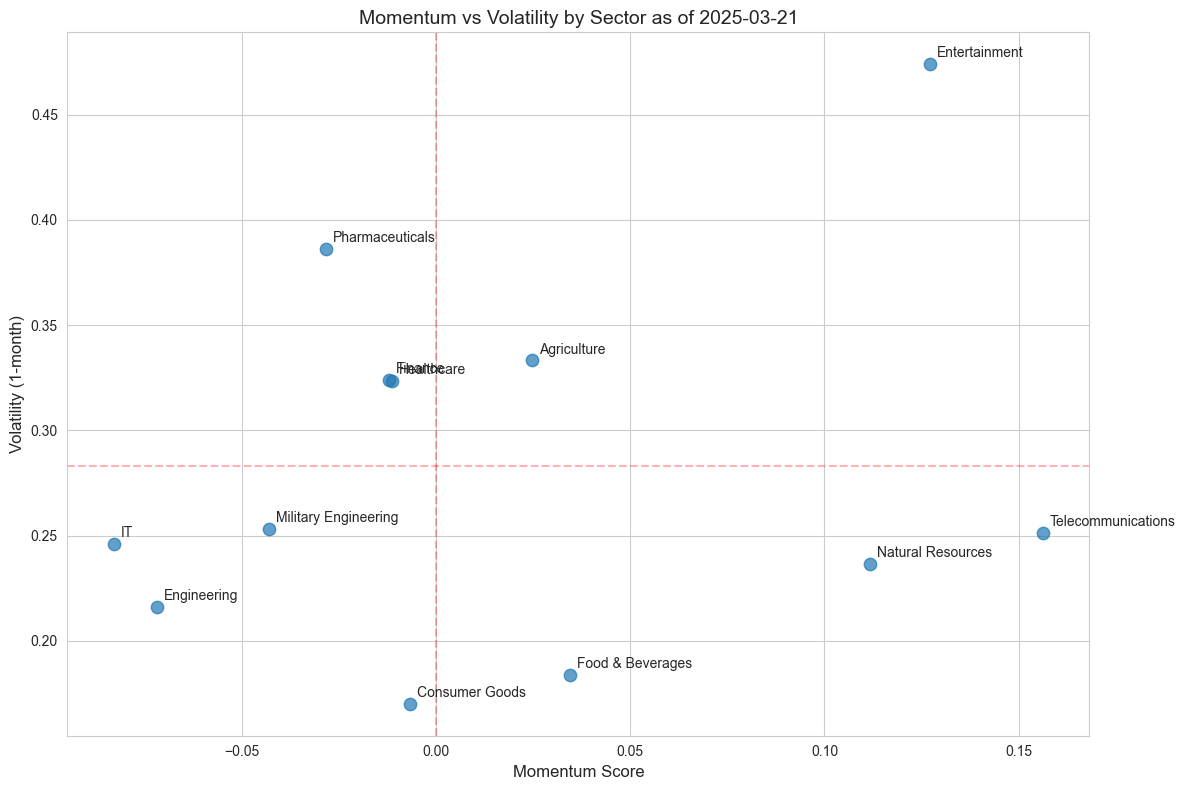

In [24]:
# Plot momentum and volatility scatter
plt.figure(figsize=(12, 8))
latest_data = sector_features[sector_features['Date'] == latest_date]

# Create a scatter plot of momentum vs volatility
plt.scatter(latest_data['Momentum_Score'], latest_data['Volatility_1m'], s=80, alpha=0.7)

# Add sector labels to each point
for i, row in latest_data.iterrows():
    plt.annotate(row['Sector'], 
                 (row['Momentum_Score'], row['Volatility_1m']),
                 xytext=(5, 5),
                 textcoords='offset points')

plt.title(f'Momentum vs Volatility by Sector as of {latest_date.date()}')
plt.xlabel('Momentum Score')
plt.ylabel('Volatility (1-month)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=latest_data['Volatility_1m'].mean(), color='r', linestyle='--', alpha=0.3)
plt.grid(True)
plt.tight_layout()
plt.show()

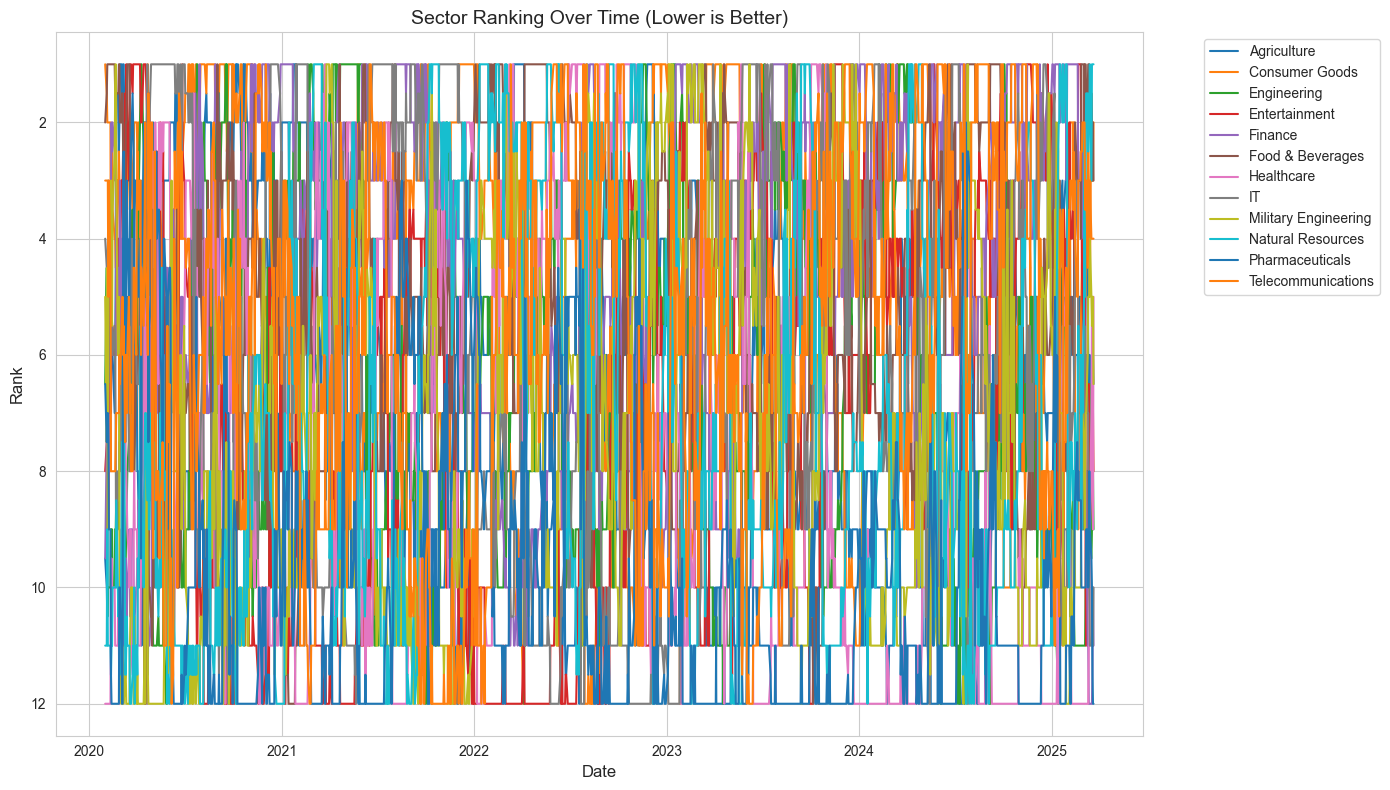

In [25]:
# Plot sector ranks over time for each sector
plt.figure(figsize=(14, 8))

# Ensure we have the 'Final_Rank' column
if 'Final_Rank' in sector_features.columns:
    for sector in sector_features['Sector'].unique():
        sector_data = sector_features[sector_features['Sector'] == sector].sort_values('Date')
        plt.plot(sector_data['Date'], sector_data['Final_Rank'], label=sector)

    plt.title('Sector Ranking Over Time (Lower is Better)')
    plt.xlabel('Date')
    plt.ylabel('Rank')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().invert_yaxis()  # Invert y-axis so that top rank (1) is at the top
    plt.tight_layout()
    plt.show()
else:
    print("'Final_Rank' column not found. Make sure ranking features were generated.")

##  Analyze Feature Importance

In [26]:
sector_features = sector_features.sort_values(['Sector', 'Date'])
sector_features['Future_Returns_1m'] = sector_features.groupby('Sector')['Returns'].shift(-20)  # Approx. 20 trading days


In [27]:
# List of features to analyze
feature_list = [
    'Relative_Strength', 'Relative_Strength_20d', 'Relative_Strength_50d', 'RS_Trend',
    'Momentum_1m', 'Momentum_3m', 'Momentum_6m', 'Momentum_12m', 'Momentum_Score',
    'Volatility_1m', 'Volatility_3m', 'Volatility_Trend', 'Relative_Volatility',
    'Market_Correlation', 'Correlation_Trend'
]

In [28]:
 #Only keep features that exist in the dataframe
feature_list = [feature for feature in feature_list if feature in sector_features.columns]


In [29]:
# Calculate correlations with future returns
correlations = []
for feature in feature_list:
    corr = sector_features[feature].corr(sector_features['Future_Returns_1m'])
    correlations.append({'Feature': feature, 'Correlation': corr})

In [30]:
# Create a dataframe and sort by absolute correlation
corr_df = pd.DataFrame(correlations)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False).reset_index(drop=True)

# Display the correlations
print("Feature Correlations with Future 1-Month Returns:")
corr_df

Feature Correlations with Future 1-Month Returns:


,Feature,Correlation,Abs_Correlation
0,Volatility_1m,0.024327,0.024327
1,Momentum_Score,-0.016631,0.016631
2,Volatility_3m,0.014355,0.014355
3,Momentum_1m,-0.011571,0.011571
4,Momentum_6m,-0.009656,0.009656
5,Momentum_12m,-0.007858,0.007858
6,Momentum_3m,-0.003068,0.003068
7,Relative_Strength_50d,-0.002658,0.002658
8,Relative_Strength,0.002544,0.002544
9,Volatility_Trend,-0.001835,0.001835


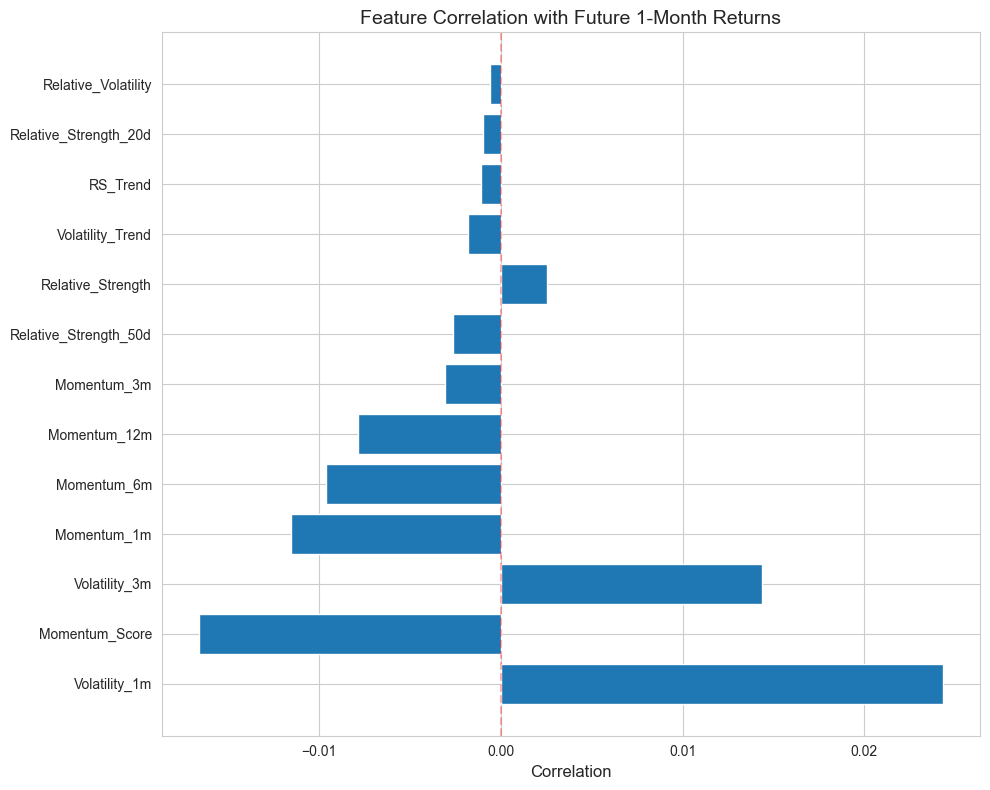

In [31]:
# Visualize feature correlations
plt.figure(figsize=(10, 8))
plt.barh(corr_df['Feature'], corr_df['Correlation'])
plt.title('Feature Correlation with Future 1-Month Returns')
plt.xlabel('Correlation')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Analyze Sector Performance in Different Economic Cycles

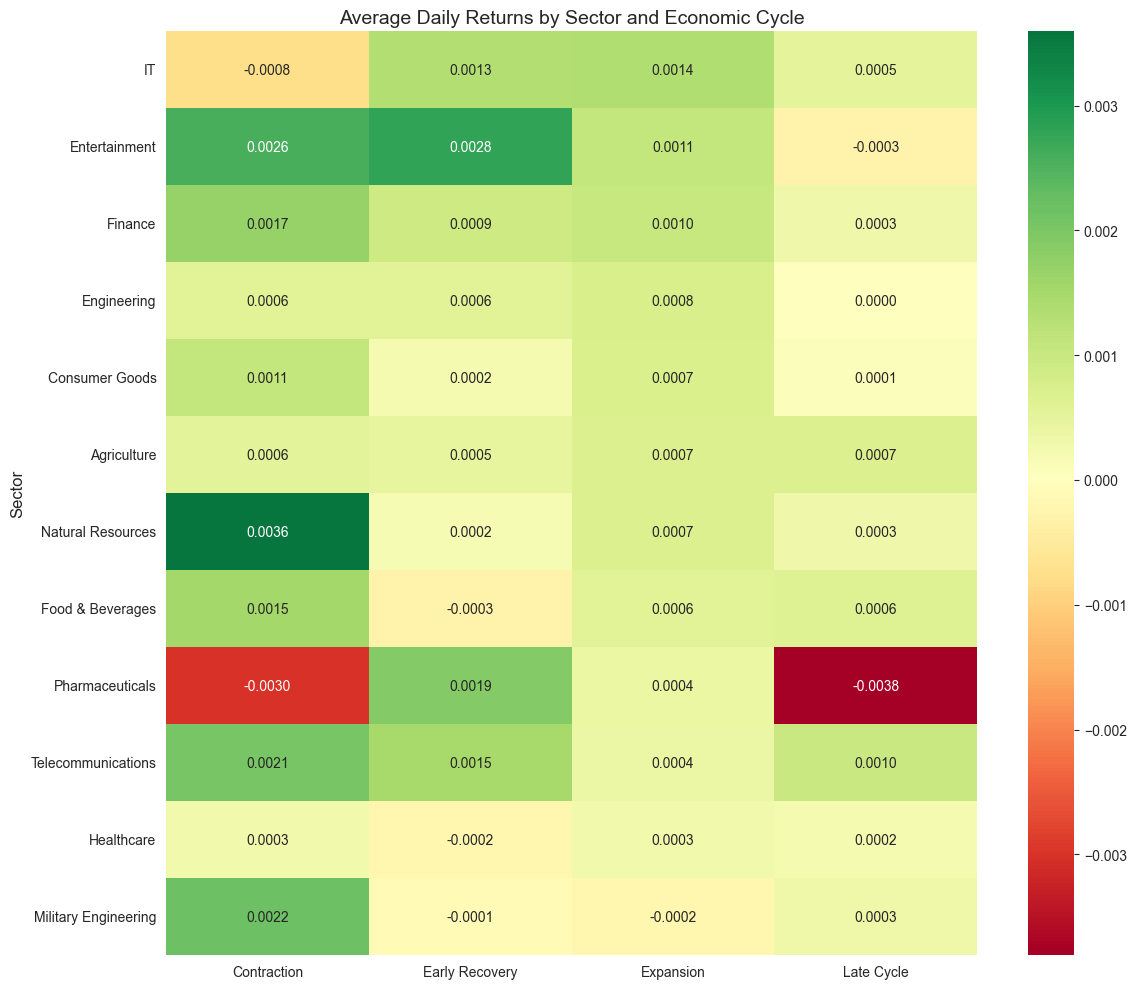

Sector Performance by Economic Cycle:


In [32]:
# Ensure we have both sector data and economic cycle information
if 'Economic_Cycle' in sector_features.columns:
    # Calculate average returns by sector and economic cycle
    cycle_performance = sector_features.groupby(['Sector', 'Economic_Cycle'])['Returns'].mean().reset_index()
    
    # Create a pivot table for easier visualization
    cycle_pivot = pd.pivot_table(
        cycle_performance, 
        values='Returns',
        index='Sector',
        columns='Economic_Cycle'
    )
    
    # Rename columns for clarity
    cycle_pivot.columns = ['Contraction', 'Early Recovery', 'Expansion', 'Late Cycle']
    
    # Sort by performance in expansion phase
    cycle_pivot = cycle_pivot.sort_values('Expansion', ascending=False)
    
    # Visualize as a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cycle_pivot, annot=True, cmap='RdYlGn', center=0, fmt='.4f')
    plt.title('Average Daily Returns by Sector and Economic Cycle')
    plt.tight_layout()
    plt.show()
    
    # Display the table
    print("Sector Performance by Economic Cycle:")
    cycle_pivot
else:
    print("Economic cycle information not available.")

## Sector Performance Based on Market Conditions

In [33]:
# Merge sector features with macro features
merged_df = pd.merge(sector_features, 
                     macro_features[['Date', 'Market_Volatility_20d']], 
                     on='Date', how='left')

In [34]:
# Define market regimes based on volatility
volatility_median = merged_df['Market_Volatility_20d'].median()
merged_df['Volatility_Regime'] = np.where(merged_df['Market_Volatility_20d'] > volatility_median, 'High', 'Low')


In [35]:
# Define market regimes based on returns
merged_df['Market_Regime'] = np.where(merged_df['Returns'] > 0, 'Up', 'Down')

# Calculate average returns by sector and market regime
regime_performance = merged_df.groupby(['Sector', 'Market_Regime'])['Returns'].mean().reset_index()


In [36]:
# Create a pivot table
regime_pivot = pd.pivot_table(
    regime_performance, 
    values='Returns',
    index='Sector',
    columns='Market_Regime'
)

In [37]:
# Calculate spread (difference between Up and Down markets)
regime_pivot['Spread'] = regime_pivot['Up'] - regime_pivot['Down']

# Sort by performance in Up market
regime_pivot = regime_pivot.sort_values('Up', ascending=False)

<Figure size 1200x800 with 0 Axes>

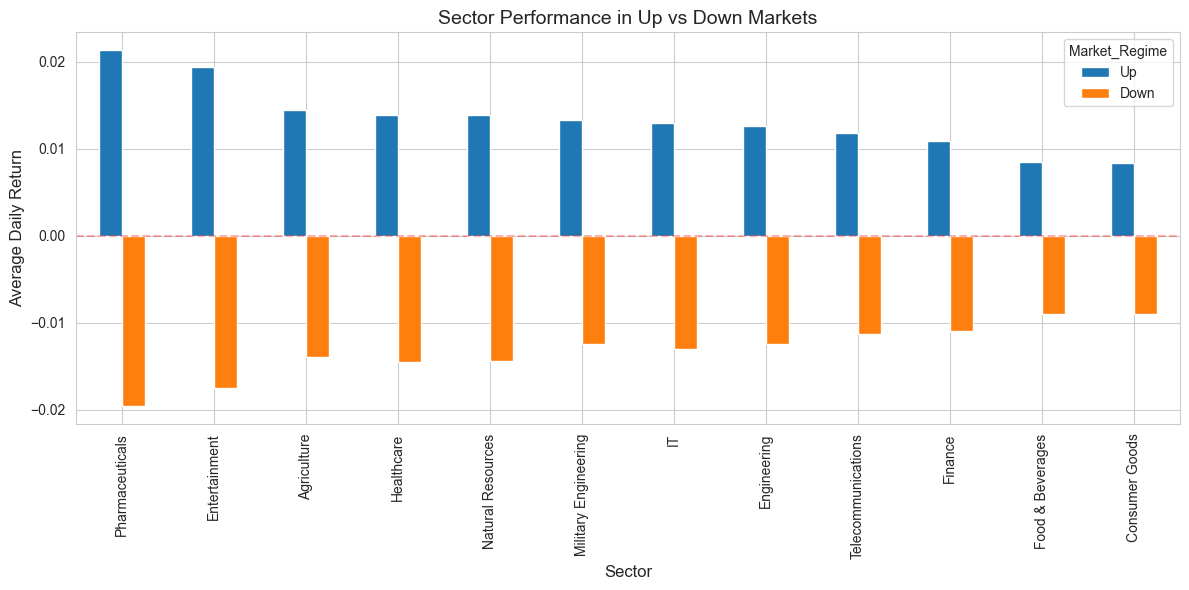

Sector Performance by Market Regime:


Market_Regime,Down,Up,Spread
Sector,,,
Pharmaceuticals,-0.019566,0.021344,0.040911
Entertainment,-0.017484,0.019454,0.036938
Agriculture,-0.013888,0.014467,0.028355
Healthcare,-0.014494,0.013918,0.028412
Natural Resources,-0.014383,0.013908,0.028291
Military Engineering,-0.012439,0.013294,0.025734
IT,-0.013035,0.012998,0.026033
Engineering,-0.012394,0.012605,0.024999
Telecommunications,-0.011264,0.011830,0.023094


In [38]:
# Visualize
plt.figure(figsize=(12, 8))
regime_pivot[['Up', 'Down']].plot(kind='bar')
plt.title('Sector Performance in Up vs Down Markets')
plt.ylabel('Average Daily Return')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the table
print("Sector Performance by Market Regime:")
regime_pivot

 ##  Save Final Feature Dataset

In [39]:

# Keep only necessary macro columns to avoid duplicate columns
macro_columns = ['Date', 'Market_Momentum_20d', 'Market_Trend_50d', 'Market_Volatility_20d',
                 'Volume_Trend_20d', 'VIX', 'VIX_Regime', 'Market_Trend_Regime', 'Economic_Cycle']


In [40]:
# Filter macro features to only include columns that exist
existing_macro_columns = [col for col in macro_columns if col in macro_features.columns]
macro_subset = macro_features[existing_macro_columns]

In [41]:
# Merge with sector features
final_features = pd.merge(sector_features, macro_subset, on='Date', how='left')


In [42]:
# Save to file
output_path = processed_dir / "combined_features.csv"
final_features.to_csv(output_path, index=False)
print(f"Saved combined features to {output_path}")

Saved combined features to D:\Sector Rotation Strategy\Sector-Rotation-Strategy\data\processed\combined_features.csv


In [43]:
# Display final dataset info
print(f"\nFinal dataset shape: {final_features.shape}")
print(f"Number of features: {len(final_features.columns)}")
print(f"Date range: {final_features['Date'].min()} to {final_features['Date'].max()}")


Final dataset shape: (15732, 48)
Number of features: 48
Date range: 2020-01-03 00:00:00 to 2025-03-21 00:00:00


In [44]:
# Select numerical features for correlation analysis
numerical_cols = [col for col in final_features.columns 
                 if final_features[col].dtype in ['float64', 'int64'] 
                 and col not in ['Date']]

In [45]:
# Calculate correlation matrix
corr_matrix = final_features[numerical_cols].corr()


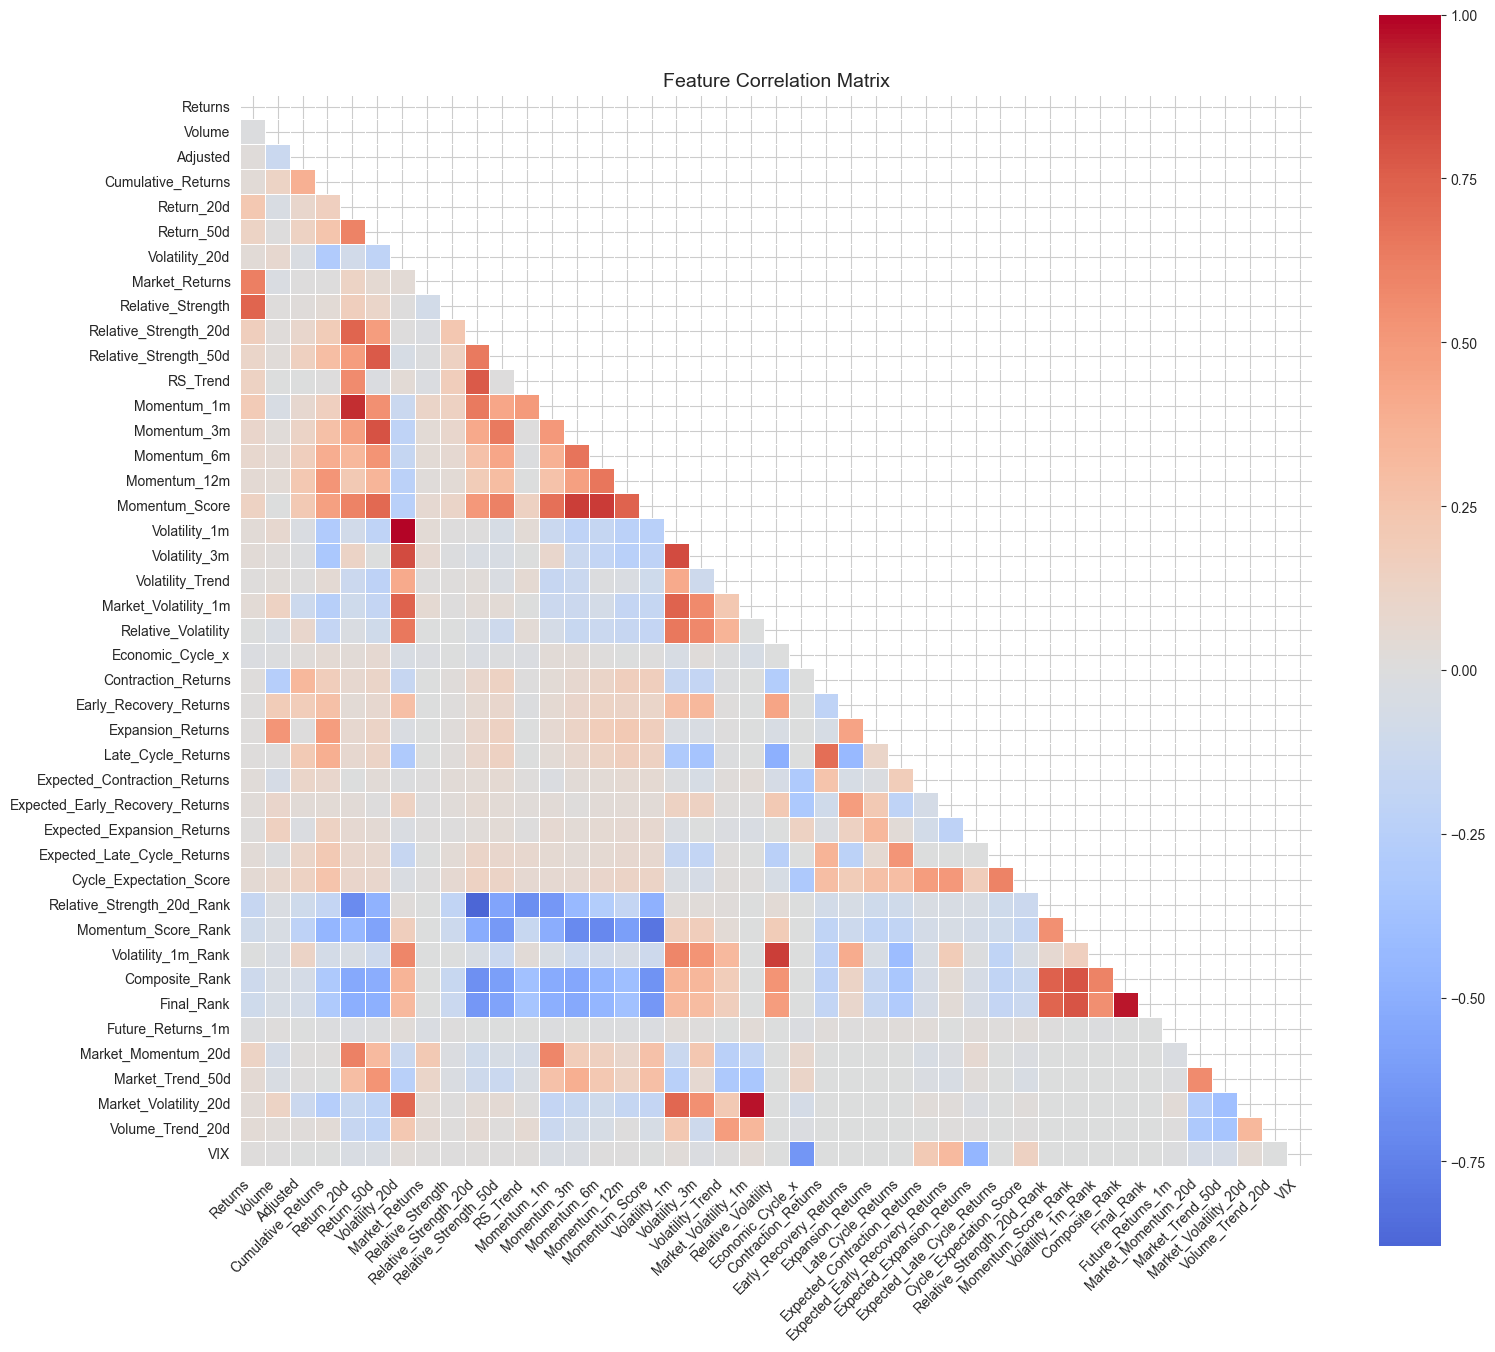

In [46]:
# Visualize correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0, 
            linewidths=.5, square=True)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()